In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read in the team codes and teaam wins by season data for use in plots
csv_path = "Cleaned_Data/team_codes_and_names.csv"
nba_team_names_df = pd.read_csv(csv_path)

#Convert Team Code to uppercase.
nba_team_names_df["Team Code"] = nba_team_names_df['Team Code'].str.upper()
nba_team_names_df

,Unnamed: 0,Team Code,Team Name
0,0,ATL,Atlanta
1,1,BOS,Boston
2,2,CHA,Charlotte
3,3,CHI,Chicago
4,4,CLE,Cleveland
5,5,DAL,Dallas
6,6,DEN,Denver
7,7,DET,Detroit
8,8,GS,Golden State
9,9,HOU,Houston


In [3]:
# Reference to the team wins CSV and read the CSV into DataFrame
csv_path = "Raw_Data/NBA Team Wins.csv"
nba_wins_df = pd.read_csv(csv_path)

# Drop columns that are not needed, and Nan rows
nba_wins_df.drop('Rank', axis = 1, inplace = True)
nba_wins_df.dropna(how = 'any', inplace = True)
nba_wins_df.set_index('Season',inplace = True)
#Transpose the dtaframe
# nba_wins_df = nba_wins_df.T
nba_wins_df = nba_wins_df.reset_index()
nba_wins_df = nba_wins_df.sort_values("Season", ascending=True)
nba_wins_df

,Season,ATL,BOS,BRK,CHI,CHO,CLE,DAL,DEN,DET,...,OKC,ORL,PHI,PHO,POR,SAC,SAS,TOR,UTA,WAS
4,2014-15,60.0,40.0,38.0,50.0,33.0,53.0,50.0,30.0,32.0,...,45.0,25.0,18.0,39.0,51.0,29.0,55.0,49.0,38.0,46.0
3,2015-16,48.0,48.0,21.0,42.0,48.0,57.0,42.0,33.0,44.0,...,55.0,35.0,10.0,23.0,44.0,33.0,67.0,56.0,40.0,41.0
2,2016-17,43.0,53.0,20.0,41.0,36.0,51.0,33.0,40.0,37.0,...,47.0,29.0,28.0,24.0,41.0,32.0,61.0,51.0,51.0,49.0
1,2017-18,24.0,55.0,28.0,27.0,36.0,50.0,24.0,46.0,39.0,...,48.0,25.0,52.0,21.0,49.0,27.0,47.0,59.0,48.0,43.0
0,2018-19,29.0,49.0,42.0,22.0,39.0,19.0,33.0,54.0,41.0,...,49.0,42.0,51.0,19.0,53.0,39.0,48.0,58.0,50.0,32.0


In [4]:
#Find the teams with the top 5 total number of wins over the past 5 seasons
nba_sum_wins_sorted_df = nba_wins_df.set_index('Season')
nba_sum_wins_sorted_df = nba_sum_wins_sorted_df.sum()
nba_sum_wins_sorted_df = pd.DataFrame(nba_sum_wins_sorted_df.sort_values(ascending = False))
nba_sum_wins_sorted_df = nba_sum_wins_sorted_df.reset_index()
nba_sum_wins_sorted_df = nba_sum_wins_sorted_df.rename(columns={'index':'Team', 0: 'Total Wins'})
nba_sum_wins_sorted_df

,Team,Total Wins
0,GSW,322.0
1,SAS,278.0
2,TOR,273.0
3,HOU,270.0
4,LAC,250.0
5,BOS,245.0
6,OKC,244.0
7,POR,238.0
8,CLE,230.0
9,UTA,227.0


In [5]:
#Find the teams with the top 5 average number of wins over the past 5 seasons
nba_mean_wins_sorted_df = nba_wins_df.mean()
nba_mean_wins_sorted_df = nba_wins_df.mean().sort_values(ascending = False)
nba_mean_wins_sorted_df.head(5)

GSW    64.4
SAS    55.6
TOR    54.6
HOU    54.0
LAC    50.0
dtype: float64

In [6]:
nba_mean_wins_sorted_df

GSW    64.4
SAS    55.6
TOR    54.6
HOU    54.0
LAC    50.0
BOS    49.0
OKC    48.8
POR    47.6
CLE    46.0
UTA    45.4
IND    44.2
MIL    44.0
WAS    42.2
MIA    41.8
ATL    40.8
DEN    40.6
MEM    39.0
DET    38.6
CHO    38.4
NOP    38.0
DAL    36.4
CHI    36.4
SAC    32.0
MIN    31.8
PHI    31.8
ORL    31.2
BRK    29.8
LAL    27.2
NYK    25.2
PHO    25.2
dtype: float64

In [7]:
x_axis = nba_wins_df['Season']
x_axis

4    2014-15
3    2015-16
2    2016-17
1    2017-18
0    2018-19
Name: Season, dtype: object

In [8]:
y_axis_GSW = nba_wins_df['GSW']
y_axis_SAS = nba_wins_df['SAS']
y_axis_TOR = nba_wins_df['TOR']
y_axis_HOU = nba_wins_df['HOU']  
y_axis_LAC = nba_wins_df['LAC']

y_axis_PHO = nba_wins_df['PHO']

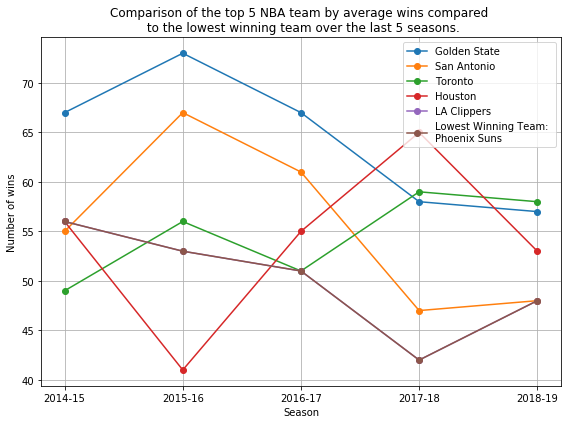

In [9]:
plt.figure(figsize=(8,6))
GSW, = plt.plot(x_axis,y_axis_GSW, marker = 'o', label = 'Golden State')
SAS, = plt.plot(x_axis,y_axis_SAS, marker = 'o', label = 'San Antonio')
TOR, = plt.plot(x_axis,y_axis_TOR, marker = 'o', label = 'Toronto')
HOU, = plt.plot(x_axis,y_axis_HOU, marker = 'o', label = 'Houston')
LAC, = plt.plot(x_axis,y_axis_LAC, marker = 'o', label = 'LA Clippers')

PHO, = plt.plot(x_axis,y_axis_LAC, marker = 'o', label = 'Lowest Winning Team: \nPhoenix Suns')

plt.title('Comparison of the top 5 NBA team by average wins compared \n to the lowest winning team over the last 5 seasons.')
plt.xlabel('Season')
plt.ylabel('Number of wins')

plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("Plots/Top5TeamsMeantoLowestMeanComparison.png")
plt.show()

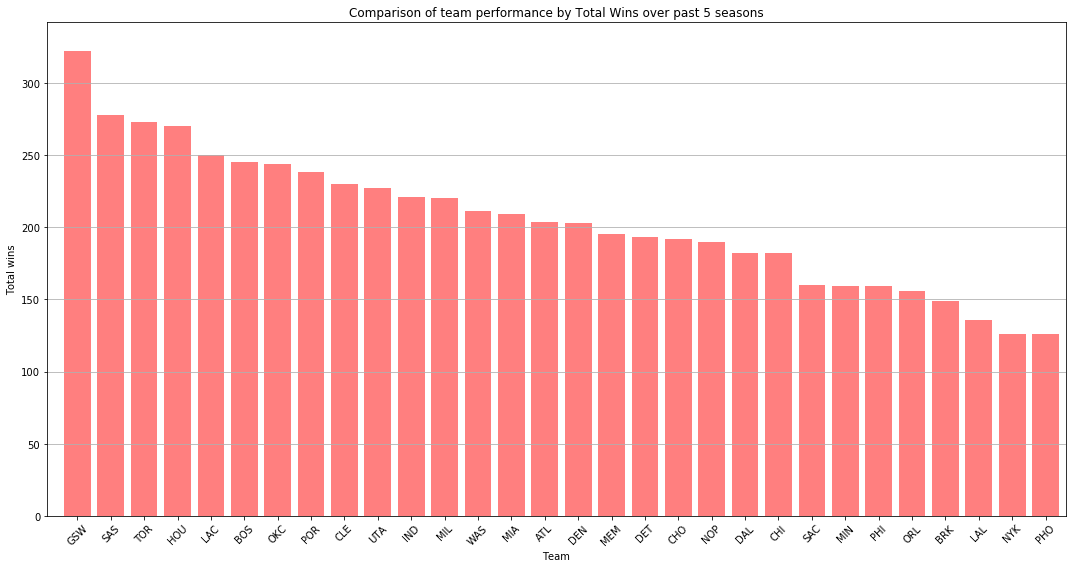

In [11]:
# Set x axis and tick locations
x_axis = np.arange(len(nba_sum_wins_sorted_df))
tick_locations = [value+0.4 for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(15,8))
plt.bar(x_axis, nba_sum_wins_sorted_df["Total Wins"], color='r', alpha=0.5, align="edge")

plt.xticks(tick_locations, nba_sum_wins_sorted_df["Team"], rotation=45)

# Set a Title and labels
plt.title("Comparison of team performance by Total Wins over past 5 seasons")
plt.xlabel("Team")
plt.ylabel("Total wins")

# Set x and y limits
plt.xlim(-0.5, len(x_axis))
plt.ylim(0, max(nba_sum_wins_sorted_df["Total Wins"])+20)

axes = plt.gca()
axes.yaxis.grid()

plt.tight_layout()
plt.savefig("Plots/TotalTeamWinsComparison.png")
plt.show()